# Model validation: Peak wave period stations

Note: this notebook requires the model output data.

This notebook compares the point data extracted from the model results against the corresponding observations.

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Import packages

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h
import plotting as pl
import mikeio

### Define metrics

In [2]:
ms.options.metrics.list = ["bias", "rmse", "mae", "cc", "si", "r2"]

Instead of reading the entire dfsu (`Area.dfsu`), we can simply load the outputted points (dfs0) since they correspond to the locations we have observations from.

### Define paths

In [3]:
mr_fldr = "../output/"    
#mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet

fig_fldr = "../figures/" 
save_fig = False if "sample" in mr_fldr else True
show_fig = True

### Load points data

Model results data are stored in a dfs0 file. We can use [MIKE IO](https://dhi.github.io/mikeio) read the data to a MIKE IO Dataset.

Note: The first two spin-up days are excluded.

In [4]:
ds = mikeio.read(f"{mr_fldr}Points.dfs0", items="*Peak Wave Period*", time = slice("2022-01-03", None))

## Compare to peak wave period observations

The [ModelSkill package](https://dhi.github.io/modelskill/) can be used to compare model results with observations.

In [5]:
tplist = h.get_tp_point_obs(station_file="stations_pwp.csv")

### Spatial coverage

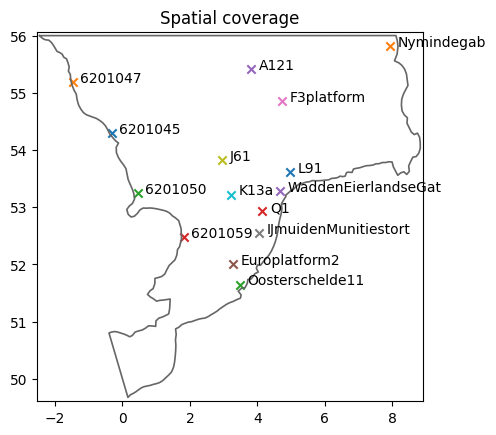

In [6]:
msh = mikeio.open("../input/Mesh_8000_elems.mesh")
if show_fig:
    ms.plotting.spatial_overview(tplist, mod=msh);

Match the right model result timeseries and observation.

Considering only observations with significant wave height larger than a certain threshold (e.g. 1.0 m) may be relevant, since lower wave heights may result in inaccurate measurements of the peak wave period.

In [7]:
# Sort out small wave heights for better comparison
threshold = 1.0  
cmps = []
for o in tplist:
    print(f"Processing {o.name}...")
    mr = ms.PointModelResult(ds[o.name+": Peak Wave Period"], name="MIKE21")
    try:
        cmp = ms.match(obs=o, mod=mr)
    except Exception as e:
        print("Station ", o.name)
        print(e)
    cmps.append(cmp.where(cmp.data['significant_wave_height'] > threshold))

cc = ms.ComparerCollection(cmps)

Processing 6201045...
Processing 6201047...
Processing 6201050...
Processing 6201059...
Processing A121...
Processing Europlatform2...
Processing F3platform...
Processing IJmuidenMunitiestort...
Processing J61...
Processing K13a...
Processing L91...
Processing Nymindegab...
Processing Oosterschelde11...
Processing Q1...
Processing WaddenEierlandseGat...


## Skill tables

In [8]:
cc.skill().round(3)

,n,bias,rmse,mae,cc,si,r2
observation,,,,,,,
6201045,12218,0.216,1.576,0.948,0.805,0.178,0.586
6201047,12586,0.499,1.792,1.021,0.768,0.204,0.458
6201050,7484,0.479,1.789,1.092,0.789,0.232,0.550
6201059,8412,0.445,1.205,0.797,0.704,0.172,0.277
A121,8989,1.119,2.908,1.491,0.552,0.320,-0.468
Europlatform2,54812,0.503,1.336,0.771,0.628,0.195,-0.161
F3platform,74676,0.430,1.697,0.895,0.723,0.212,0.295
IJmuidenMunitiestort,49794,0.549,1.750,0.962,0.647,0.242,0.079
J61,68131,0.331,1.497,0.830,0.739,0.200,0.414


In [9]:
cc.mean_skill().round(3)

,n,bias,rmse,mae,cc,si,r2
model,,,,,,,
MIKE21,551807,0.534,1.721,0.986,0.69,0.221,0.171


## Scatter plots

Note that in the scatter plots the observed peak wave period $(T_p)$ data appear as discrete horizontal lines, especially at higher values, while the modelled $T_p$ values vary smoothly.
The model values can appear as more smooth if the data is extracted using interpolation rather than as discrete points.
For validation against observations, the model results are extracted as interpolated values at the station locations.

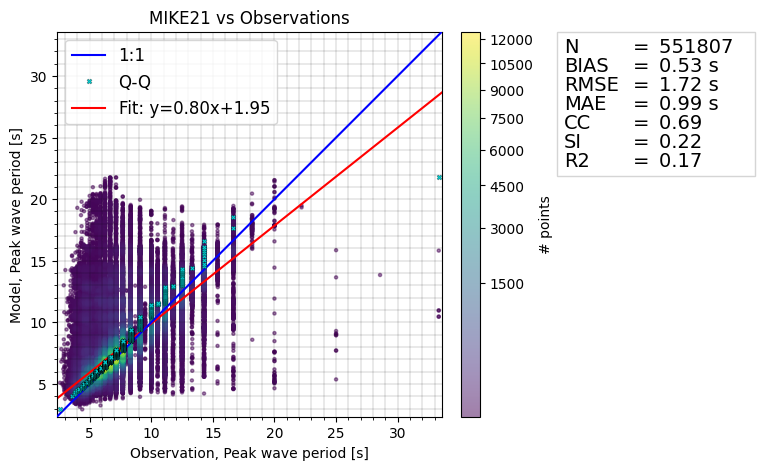

In [10]:
cc.plot.scatter(skill_table=True, show_points=True, figsize=(6,5))
plt.title("MIKE21 vs Observations")
if show_fig:
    plt.show()
else:
    plt.close()

fig saved to: ../figures/peak_wave_period_comparison_6201045.png


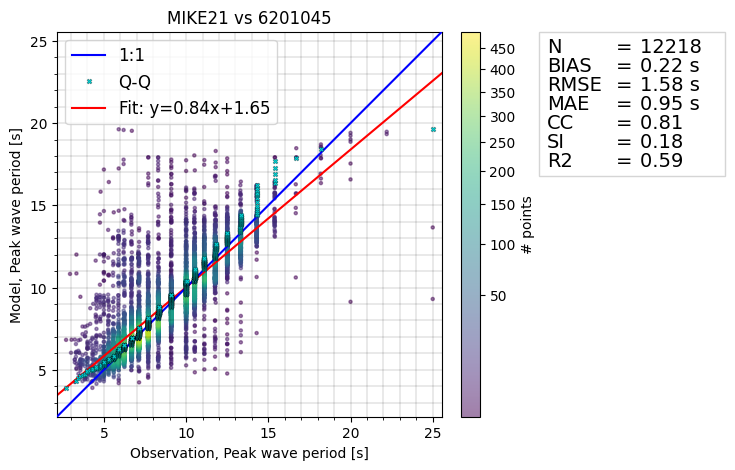

fig saved to: ../figures/peak_wave_period_comparison_6201047.png


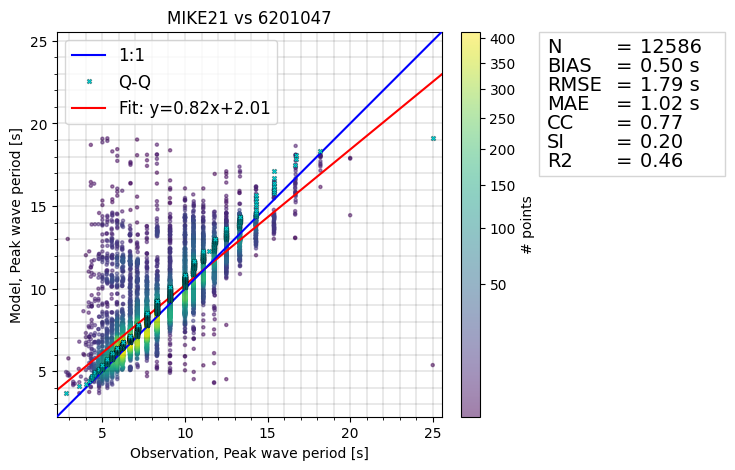

fig saved to: ../figures/peak_wave_period_comparison_6201050.png


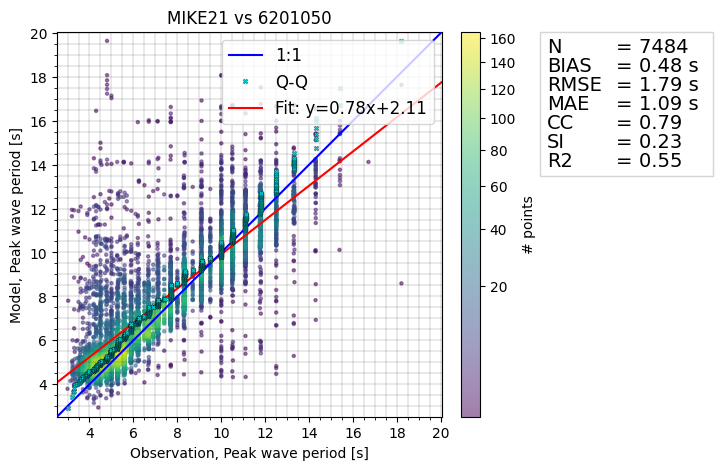

fig saved to: ../figures/peak_wave_period_comparison_6201059.png


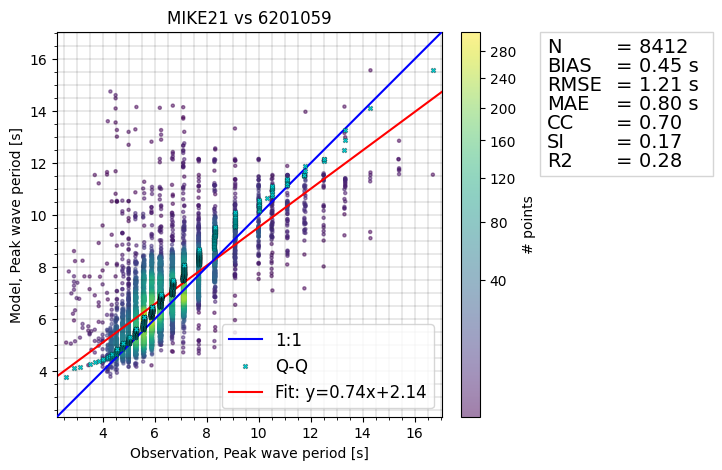

fig saved to: ../figures/peak_wave_period_comparison_A121.png


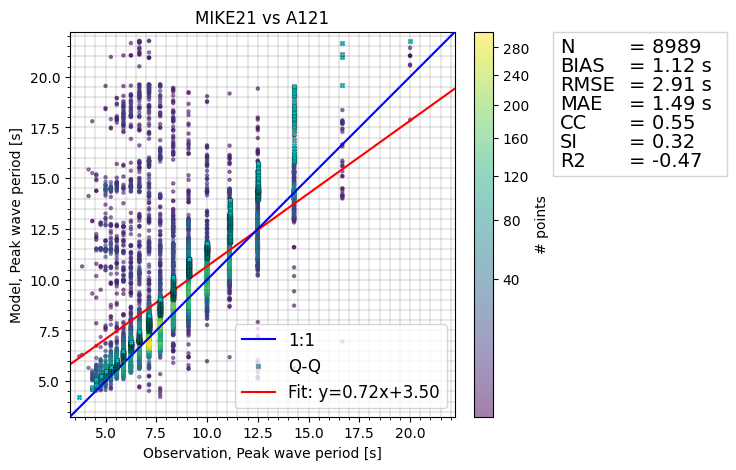

fig saved to: ../figures/peak_wave_period_comparison_Europlatform2.png


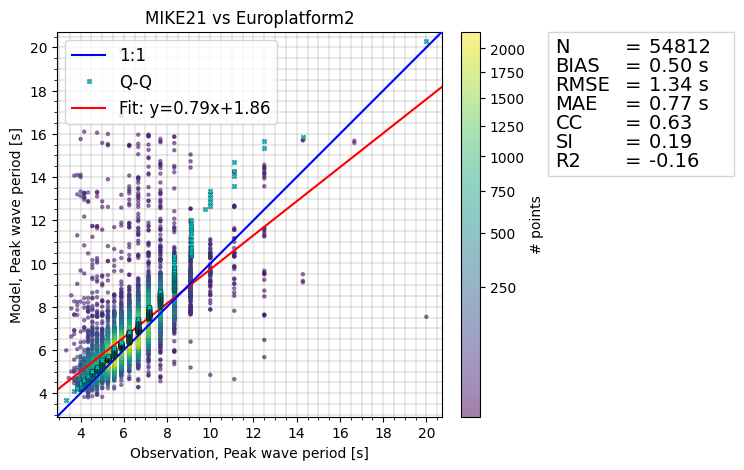

fig saved to: ../figures/peak_wave_period_comparison_F3platform.png


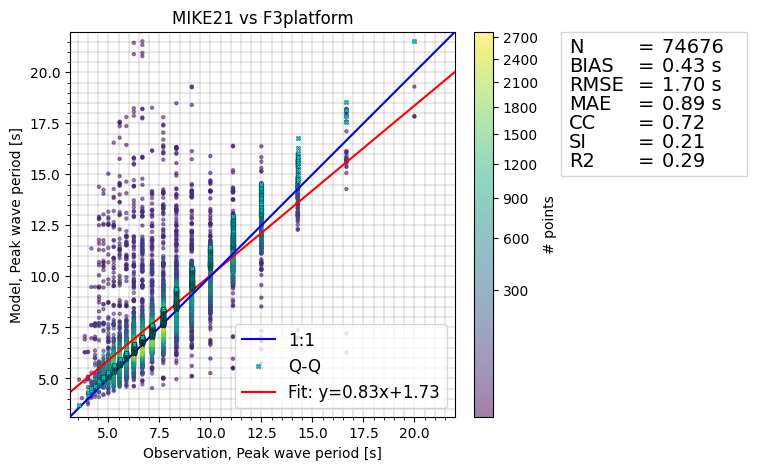

fig saved to: ../figures/peak_wave_period_comparison_IJmuidenMunitiestort.png


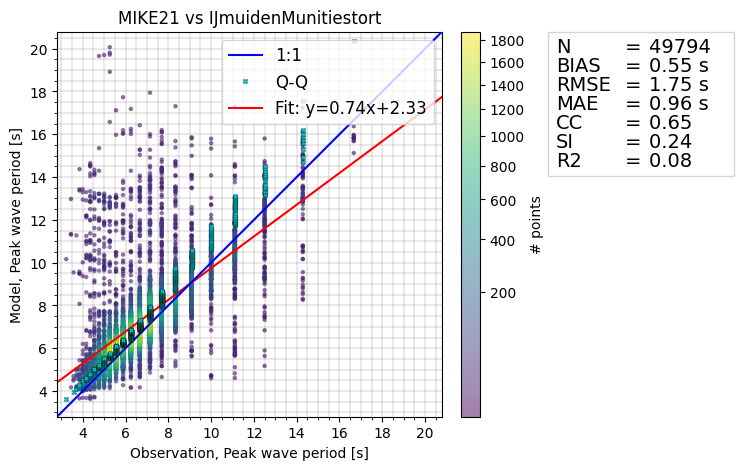

fig saved to: ../figures/peak_wave_period_comparison_J61.png


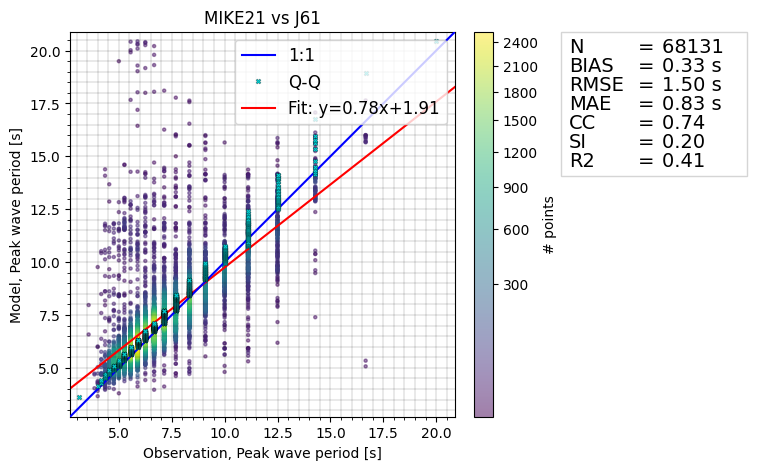

fig saved to: ../figures/peak_wave_period_comparison_K13a.png


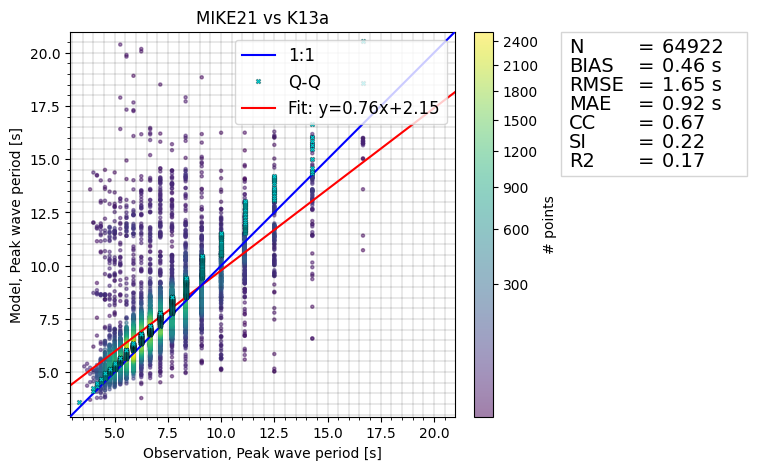

fig saved to: ../figures/peak_wave_period_comparison_L91.png


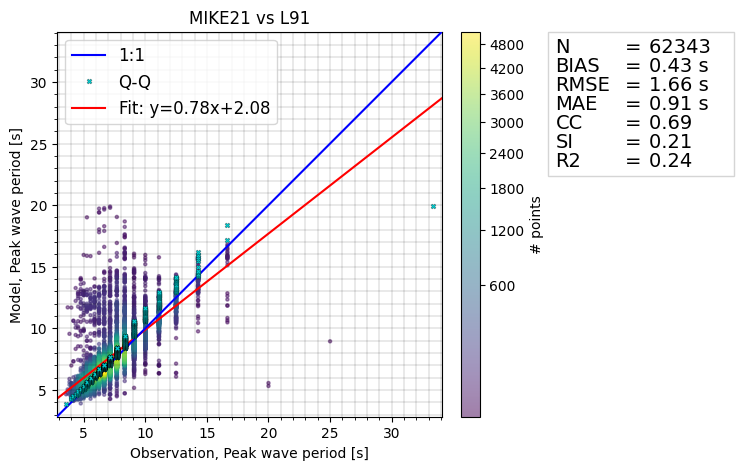

fig saved to: ../figures/peak_wave_period_comparison_Nymindegab.png


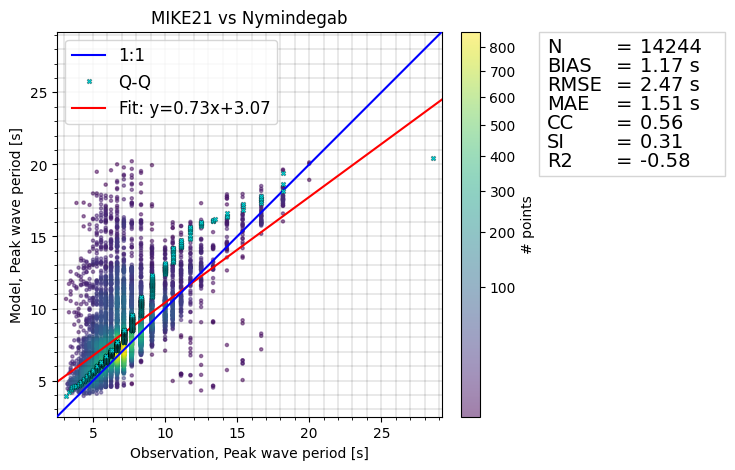

fig saved to: ../figures/peak_wave_period_comparison_Oosterschelde11.png


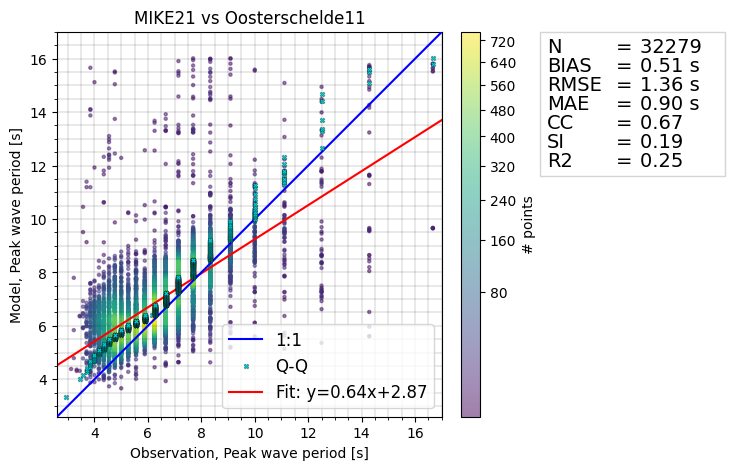

fig saved to: ../figures/peak_wave_period_comparison_Q1.png


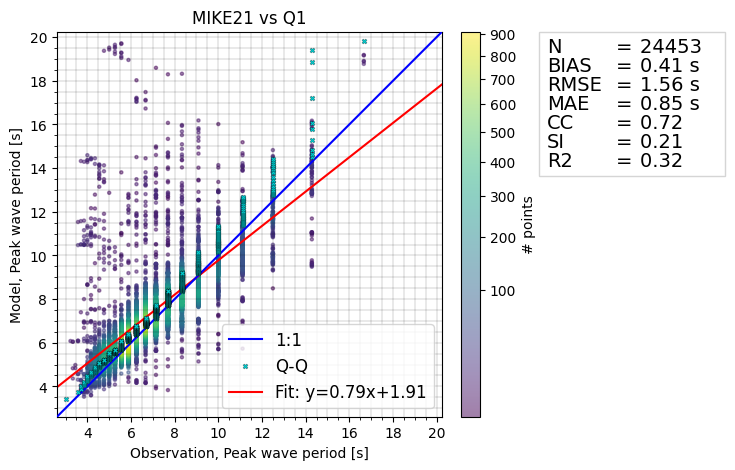

fig saved to: ../figures/peak_wave_period_comparison_WaddenEierlandseGat.png


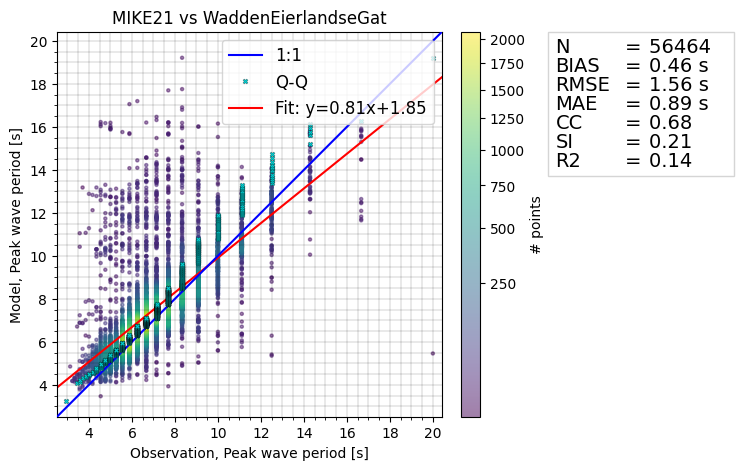

In [11]:
n_points_shown = 10000
for cmp in cc:
    cmp.plot.scatter(skill_table=True, show_points=n_points_shown, figsize=(6,5), bins=40);
    if save_fig:
        plt.savefig(f"{fig_fldr}peak_wave_period_comparison_{cmp.name}.png", bbox_inches='tight');
        print(f"fig saved to: {fig_fldr}peak_wave_period_comparison_{cmp.name}.png")
    if show_fig:
        plt.show()
    else:
        plt.close()

## Timeseries

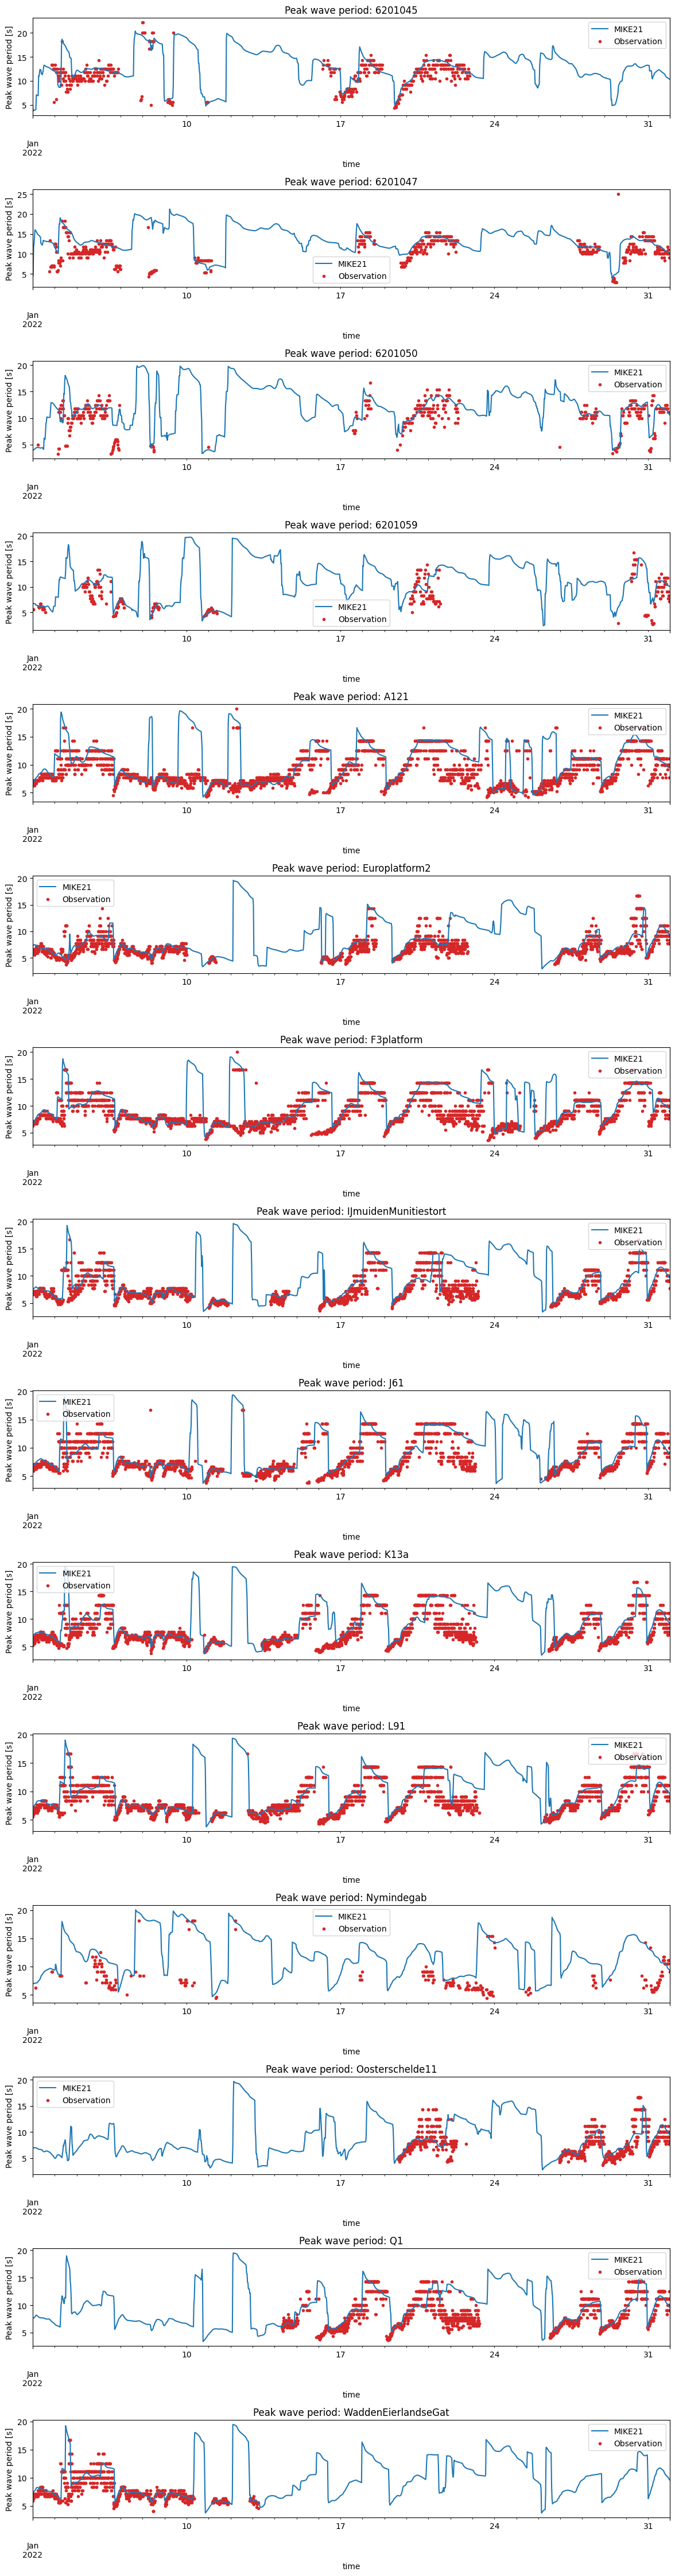

In [12]:
if show_fig:
    pl.plot_timeseries_currents(cc = cc, title='Peak wave period')